## PicoCTF Exercises (Homework 1)
### Sebastián Navarro


## interendec

### Solution 1

El nombre de este reto "interencdec" nos da una pista de que se requiere decodificar algo o intercambiar bits. El texto podría estar en una codificación Base 64. Por lo que, me dirigí a la página web https://www.base64decode.org/ para decodificar el texto provisto.  

* **Texto codificado:**
YidkM0JxZGtwQlRYdHFhR3g2YUhsZmF6TnFlVGwzWVROclgyeG9OakJzTURCcGZRPT0nCg==

* **Texto decodificado:**
d3BqdkpBTXtqaGx6aHlfazNqeTl3YTNrX2xoNjBsMDBpfQ==

Lo decodificamos nuevamente y obtenemos
**wpjvJAM{jhlzhy_k3jy9wa3k_lh60l00i}**

Esta combinación de letras puede indicar una flag con el formato picoCTF{ }. Por tanto sabemos que _J_ es _C_, _A_ es _T_ y M es _F_ entonces se trata de un cifrado Caesar desplazado **7 posiciones** hacia atrás




In [3]:
# Function of Caesar cipher decryption
def caesar_cipher_decrypt(text, shift):
    # Initialize the plain text
    plain_text = ""
    
    for char in text:
        # Check if the character is a letter
        if char.isalpha():
            # Check if the character is uppercase
            if char.isupper():
                # Shift the character
                plain_text += chr((ord(char) - 65 - shift) % 26 + 65)
            # Check if the character is lowercase
            elif char.islower():
                # Shift the character
                plain_text += chr((ord(char) - 97 - shift) % 26 + 97)
        else:
            # Add the character to the plain text
            plain_text += char
    
    return plain_text


plain_text = "wpjvJAM{jhlzhy_k3jy9wa3k_lh60l00i}"
shift = 7

print(caesar_cipher_decrypt(plain_text, shift))


picoCTF{caesar_d3cr9pt3d_ea60e00b}


### Solution 2

De la anterior solución, ya conocemos que se trata de un texto codificado en base64, entonces me dirigí a la página web https://gchq.github.io/CyberChef/ y utilicé la receta **From Base64** para decodificar el texto

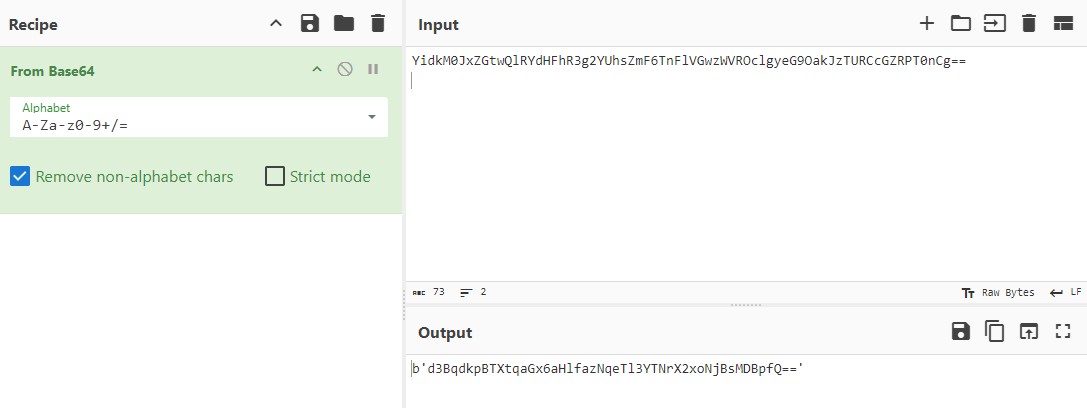

Volvemos a decodificar y nos queda:

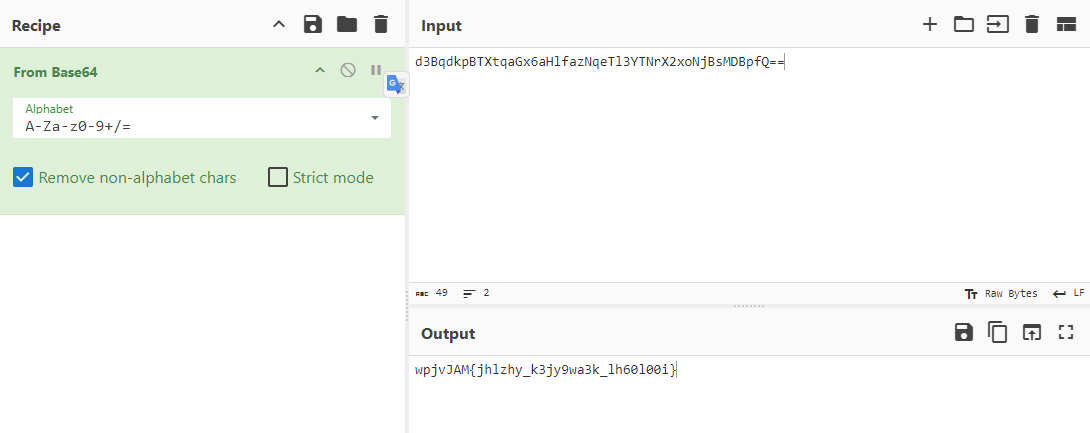

Finalmente, usé la receta **ROT 13 Brute Force** para hallar el flag y obtuve el resultado en _Amount = 19_

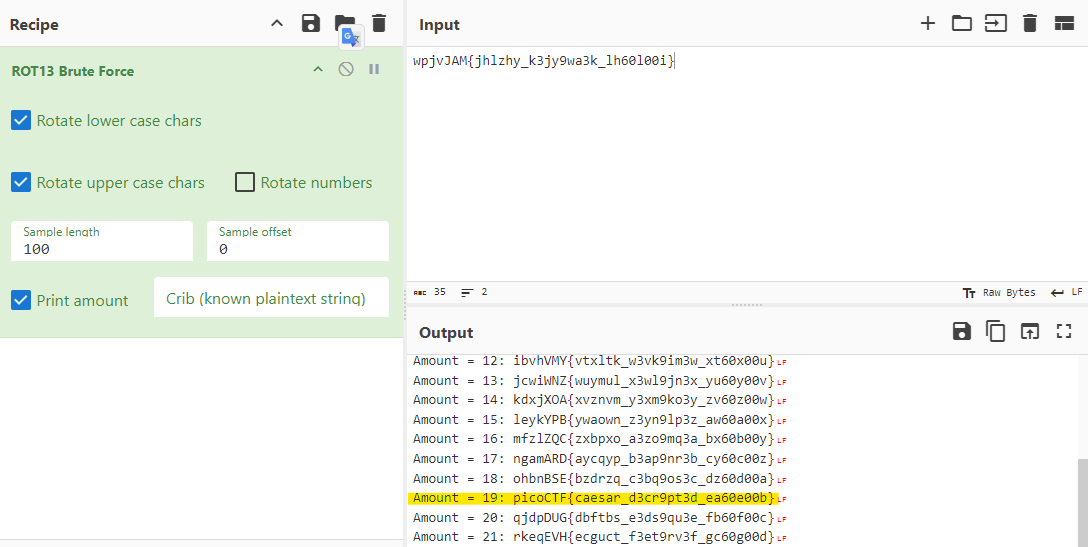

## The Numbers

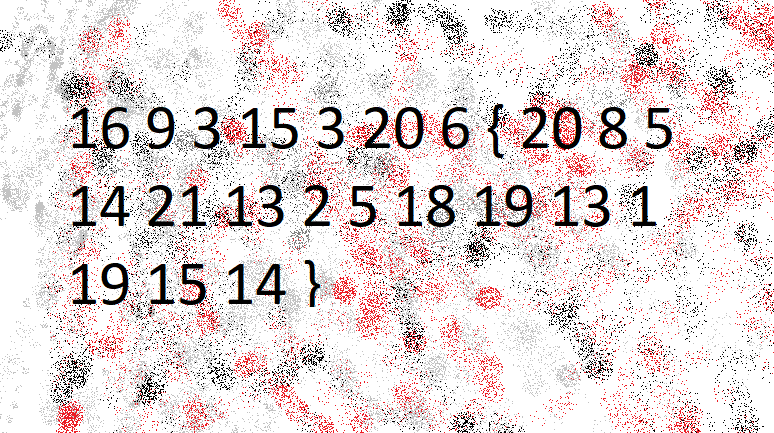

### Solution 1

Podemos asociar los números de la imagen con la palabra común **PICOCTF{}**. Por tanto:
* P = 16
* I = 9
* C = 3
* O = 15
* C = 3
* T = 20
* F = 6

En este punto, podemos asumir que los números representan las posiciones de las letras del abecedario desde A = 1 hasta Z = 26. Entonces, escribí un código de python para decodificar automáticamente los números y encontrar la flag **PICOCTF{THENUMBERSMASON}**:

In [2]:
# Function that takes an array of numbers and decrypts them matching with the alphabet example A=1, B=2, C=3, etc.
def decrypt_numbers(numbers):
    # Initialize the plain text
    plain_text = ""
    
    for i, num in enumerate(numbers):
        # Check if the number is within the range of 1-26
        if 1 <= num <= 26:
            # Convert number to corresponding uppercase letter
            plain_text += chr(num + 64)
        else:
            # Add the number as is
            plain_text += str(num)
        
        # Add opening brace after the 7th character
        if i == 6:
            plain_text += "{"
    
    # Add closing brace at the end
    plain_text += "}"
    
    return plain_text

numbers = [16, 9, 3, 15, 3, 20, 6, 20, 8, 5, 14, 21, 13, 2, 5, 18, 19, 13, 1, 19, 15, 14]

print(decrypt_numbers(numbers))

PICOCTF{THENUMBERSMASON}


### Solution 2

Me dirigí a la página web https://www.dcode.fr/letter-number-cipher y uilicé la herramienta **Number to Letter A1Z26 Converter** para descifrar los números, quedando la solución de la siguiente manera:

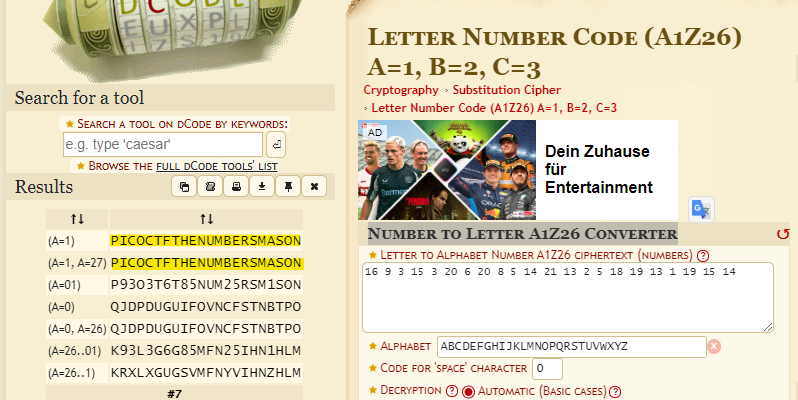

## Rotation

### Solution 1

Por el nombre del reto y la pista, podemos asumir que se trata de un tipo de cifrado de rotación, un cifrado en el que cada letra del alfabeto es desplazada **n** posiciones.
En mi caso, el texto cifrado es `xqkwKBN{z0bib1wv_l3kzgxb3l_i4j7l759}`. Del formato común **picoCTF{ }** se puede asumir que:
* p = x
* i = q
* c = k
* o = w
* C = K
* T = B
* F = N
  
En este punto, podemos asumir que cada letra está desplazada **8 posiciones** hacia atrás. Entonces reutilicé el código del ejercicio de interendec para descifrar el texto y encontrar la flag **picoCTF{r0tat1on_d3crypt3d_a4b7d759}**:

In [1]:
# Function of Caesar cipher decryption
def caesar_cipher_decrypt(text, shift):
    # Initialize the plain text
    plain_text = ""
    
    for char in text:
        # Check if the character is a letter
        if char.isalpha():
            # Check if the character is uppercase
            if char.isupper():
                # Shift the character
                plain_text += chr((ord(char) - 65 - shift) % 26 + 65)
            # Check if the character is lowercase
            elif char.islower():
                # Shift the character
                plain_text += chr((ord(char) - 97 - shift) % 26 + 97)
        else:
            # Add the character to the plain text
            plain_text += char
    
    return plain_text


plain_text = "xqkwKBN{z0bib1wv_l3kzgxb3l_i4j7l759}"
shift = 8

print(caesar_cipher_decrypt(plain_text, shift))


picoCTF{r0tat1on_d3crypt3d_a4b7d759}


### Solution 2

Me dirigí a la página web https://www.dcode.fr/rot-cipher para descifrar el texto encriptado con rotación `xqkwKBN{z0bib1wv_l3kzgxb3l_i4j7l759}` y encontré la flag 